In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
)

# Load dataset
data_url = (
    'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/'
    'main/02.%20Deep%20Learning/Dataset/income.csv'
)
df = pd.read_csv(data_url)

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
display(df.head())


First 5 rows of the dataset:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Shape of the dataset: (48842, 15)

Missing values per column:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


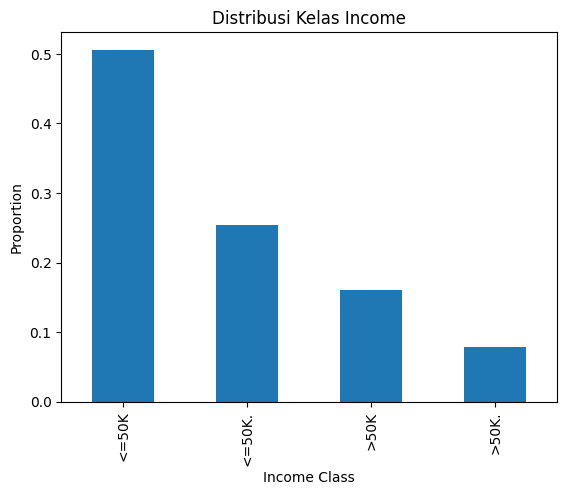

In [3]:
# Displaying the shape of the dataset and checking for missing values
print("Shape of the dataset:", df.shape)
print("\nMissing values per column:")
print(df.isna().sum())

# Visualizing the distribution of the target variable 'income'
df['income'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribusi Kelas Income')
plt.xlabel('Income Class')
plt.ylabel('Proportion')
plt.show()


In [4]:
# Convert the 'income' column to numeric (1 for '>50K', 0 for '<=50K')
if df['income'].dtype == 'object':
    df['income'] = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

# Separate features (X) and target (y)
target = 'income'
X = df.drop(columns=[target])
y = df[target]

# Apply one-hot encoding to categorical features
X = pd.get_dummies(X)

print("Dimensi data setelah encoding:")
print(X.shape)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

print("Ukuran data training:", X_train.shape)
print("Ukuran data testing:", X_test.shape)



Dimensi data setelah encoding:
(48842, 108)
Ukuran data training: (34189, 108)
Ukuran data testing: (14653, 108)


KNeighborsClassifier (K-NN)

KNeighborsClassifier adalah algoritma pembelajaran mesin berbasis k-nearest neighbors (K-NN), di mana klasifikasi dilakukan berdasarkan kedekatannya dengan titik data lain yang sudah diklasifikasikan.

Parameter n_neighbors=5 berarti model akan menggunakan 5 tetangga terdekat untuk menentukan kelas suatu data.

Matematika:

Untuk data yang ingin diklasifikasikan (misalnya, data uji
𝑥
test
x
test
​
 ), K-NN akan mencari 5 titik terdekat (
𝑥
1
,
𝑥
2
,
.
.
.
,
𝑥
5
x
1
​
 ,x
2
​
 ,...,x
5
​
 ) dalam data pelatihan (
𝑋
train
X
train
​
 ) menggunakan suatu ukuran jarak (biasanya Euclidean distance).

Setelah menemukan tetangga terdekat, kelas data yang diprediksi adalah kelas mayoritas dari 5 tetangga tersebut.

2. Fitting Model dengan Data Pelatihan
python
Copy
knn.fit(X_train, y_train)
Penjelasan:

Fungsi fit() digunakan untuk melatih model menggunakan data pelatihan (X_train untuk fitur dan y_train untuk label target).

Model K-NN tidak memerlukan tahap pelatihan eksplisit yang rumit, karena model ini menyimpan data pelatihan itu sendiri. Pada tahap prediksi, K-NN akan mencari tetangga terdekat berdasarkan data pelatihan yang ada.

Matematika:

Tidak ada perhitungan parameter model yang dilakukan, karena K-NN adalah model berbasis instance-based learning. Semua data pelatihan disimpan dalam model dan digunakan langsung untuk klasifikasi saat prediksi.

3. Memprediksi Kelas untuk Data Uji
python
Copy
y_pred_knn = knn.predict(X_test)
Penjelasan:

Fungsi predict() digunakan untuk melakukan prediksi berdasarkan data uji (X_test).

Model akan mengklasifikasikan setiap titik data uji dengan memeriksa 5 tetangga terdekat dalam data pelatihan dan menetapkan kelas mayoritas di antara tetangga tersebut.

Matematika:

Untuk setiap data uji
𝑥
test
x
test
​
 , model menghitung jarak ke semua titik dalam
𝑋
train
X
train
​
 .

Model memilih 5 tetangga terdekat dengan menggunakan suatu ukuran jarak (biasanya Euclidean distance):

Distance
(
𝑥
test
,
𝑥
𝑖
)
=
∑
𝑗
=
1
𝑛
(
𝑥
test
,
𝑗
−
𝑥
𝑖
,
𝑗
)
2
Distance(x
test
​
 ,x
i
​
 )=
j=1
∑
n
​
 (x
test,j
​
 −x
i,j
​
 )
2

​

di mana
𝑥
𝑖
x
i
​
  adalah data pelatihan dan
𝑥
test
x
test
​
  adalah data uji.

Kemudian, kelas dari
𝑥
test
x
test
​
  diprediksi berdasarkan mayoritas kelas dari 5 tetangga terdekat. Jika lebih dari 3 dari 5 tetangga terdekat memiliki kelas A, maka kelas untuk
𝑥
test
x
test
​
  adalah A.

4. Memprediksi Probabilitas untuk Setiap Kelas
python
Copy
y_prob_knn = knn.predict_proba(X_test)[:, 1]
Penjelasan:

Fungsi predict_proba() digunakan untuk mendapatkan probabilitas prediksi untuk setiap kelas dalam data uji (X_test).

Hasilnya adalah array dua dimensi, di mana setiap baris mewakili probabilitas kelas untuk data uji, dan setiap kolom mewakili kelas yang berbeda. Kolom pertama untuk kelas 0, kolom kedua untuk kelas 1, dan seterusnya.

Dengan menggunakan [:, 1], kita hanya memilih probabilitas untuk kelas 1 (misalnya, jika kita ingin memprediksi probabilitas seseorang memiliki pendapatan >50K dalam dataset pendapatan).

Matematika:

Misalkan kita memiliki 2 kelas: kelas 0 dan kelas 1.

Untuk setiap titik data uji
𝑥
test
x
test
​
 , model menghitung probabilitas
𝑃
(
class 0
∣
𝑥
test
)
P(class 0∣x
test
​
 ) dan
𝑃
(
class 1
∣
𝑥
test
)
P(class 1∣x
test
​
 ) berdasarkan 5 tetangga terdekat.

Hasilnya adalah vektor probabilitas, misalnya:

𝑃
(
class 0
∣
𝑥
test
)
=
0.3
,
𝑃
(
class 1
∣
𝑥
test
)
=
0.7
P(class 0∣x
test
​
 )=0.3,P(class 1∣x
test
​
 )=0.7
Dengan [:, 1], kita mengambil probabilitas untuk kelas 1, yang dalam hal ini adalah 0.7.

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

1. DecisionTreeClassifier (Model Pohon Keputusan)
python
Copy
dt = DecisionTreeClassifier(random_state=42)
Penjelasan:

DecisionTreeClassifier adalah algoritma pohon keputusan yang digunakan untuk klasifikasi. Pohon keputusan membagi data menjadi subkelompok berdasarkan nilai fitur dengan tujuan untuk memisahkan kelas target sebaik mungkin.

Parameter random_state=42 memastikan bahwa hasil model selalu konsisten, sehingga hasilnya dapat direproduksi.

Matematika:

Pohon keputusan membuat keputusan berdasarkan serangkaian aturan if-else yang diterapkan pada data. Algoritma ini mencari fitur yang memberikan pembagian terbaik (menggunakan metrik seperti Gini Impurity atau Entropy).

Pembagian dibuat untuk memisahkan data ke dalam daun yang mewakili kelas target (misalnya, kelas 0 atau kelas 1).

Misalnya, pada fitur
𝑥
test
,
𝑗
x
test,j
​
  (fitur
𝑗
j) dalam dataset, algoritma membagi data menjadi dua kelompok berdasarkan apakah
𝑥
test
,
𝑗
≤
𝑡
x
test,j
​
 ≤t, di mana
𝑡
t adalah nilai ambang (threshold).

2. Melatih Model dengan Data Pelatihan
python
Copy
dt.fit(X_train, y_train)
Penjelasan:

Fungsi fit() digunakan untuk melatih model menggunakan data pelatihan (X_train untuk fitur dan y_train untuk label target).

Model pohon keputusan membangun struktur pohon berdasarkan fitur-fitur yang ada di data pelatihan dan berusaha menemukan pembagian terbaik untuk mengklasifikasikan data.

Matematika:

Selama pelatihan, algoritma pohon keputusan membagi data pada setiap fitur untuk mengurangi impurity (kebingungannya) di setiap node pohon.

Impurity biasanya dihitung dengan metrik seperti Gini Index atau Entropy:

Gini Impurity untuk node
𝑡
t:

𝐺
𝑖
𝑛
𝑖
(
𝑡
)
=
1
−
∑
𝑖
=
1
𝑘
𝑝
𝑖
2
Gini(t)=1−
i=1
∑
k
​
 p
i
2
​

di mana
𝑝
𝑖
p
i
​
  adalah proporsi kelas
𝑖
i di node
𝑡
t.

Entropy untuk node
𝑡
t:

𝐸
𝑛
𝑡
𝑟
𝑜
𝑝
𝑦
(
𝑡
)
=
−
∑
𝑖
=
1
𝑘
𝑝
𝑖
log
⁡
2
(
𝑝
𝑖
)
Entropy(t)=−
i=1
∑
k
​
 p
i
​
 log
2
​
 (p
i
​
 )
di mana
𝑝
𝑖
p
i
​
  adalah proporsi kelas
𝑖
i di node
𝑡
t.

Algoritma pohon keputusan terus membagi data hingga kriteria berhenti tercapai (misalnya, kedalaman pohon atau jumlah titik data dalam node kecil).

3. Memprediksi Kelas untuk Data Uji
python
Copy
y_pred_dt = dt.predict(X_test)
Penjelasan:

Fungsi predict() digunakan untuk memprediksi kelas dari data uji (X_test).

Setiap data uji dipetakan ke dalam pohon keputusan dan ditentukan kelasnya berdasarkan aturan yang dibangun selama pelatihan.

Matematika:

Untuk setiap titik data uji
𝑥
test
x
test
​
 , pohon keputusan menilai fitur-fiturnya dan mengikuti serangkaian aturan if-else yang ditentukan untuk memutuskan kelasnya.

Misalnya, jika
𝑥
test
,
1
≤
5
x
test,1
​
 ≤5 dan
𝑥
test
,
2
>
3
x
test,2
​
 >3, maka kelas untuk
𝑥
test
x
test
​
  akan menjadi kelas 1, berdasarkan aturan dalam pohon.

4. Memprediksi Probabilitas untuk Setiap Kelas
python
Copy
y_prob_dt = dt.predict_proba(X_test)[:, 1]
Penjelasan:

Fungsi predict_proba() digunakan untuk menghasilkan probabilitas prediksi untuk setiap kelas dalam data uji (X_test).

Hasilnya adalah array dua dimensi yang memberikan probabilitas untuk setiap kelas, dan dengan [:, 1], kita hanya mengambil probabilitas untuk kelas 1 (misalnya, jika kita ingin memprediksi probabilitas seseorang memiliki pendapatan >50K dalam dataset pendapatan).

Matematika:

Setiap node di pohon keputusan memiliki probabilitas untuk masing-masing kelas. Misalnya, untuk suatu node
𝑡
t, jika mayoritas data di node tersebut memiliki kelas 1, maka probabilitas untuk kelas 1 di node tersebut akan lebih besar.

Fungsi predict_proba() menghitung probabilitas kelas untuk setiap titik data uji berdasarkan distribusi kelas di daun tempat data tersebut berakhir.

Probabilitas untuk kelas 1:

𝑃
(
class 1
∣
𝑥
test
)
=
Jumlah data kelas 1 di daun
Jumlah total data di daun
P(class 1∣x
test
​
 )=
Jumlah total data di daun
Jumlah data kelas 1 di daun
​

Probabilitas untuk kelas 0:

𝑃
(
class 0
∣
𝑥
test
)
=
1
−
𝑃
(
class 1
∣
𝑥
test
)
P(class 0∣x
test
​
 )=1−P(class 1∣x
test
​
 )
Dengan [:, 1], kita mengambil kolom kedua dari array probabilitas, yang mewakili probabilitas untuk kelas 1.

In [9]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

Accuracy: Mengukur proporsi prediksi yang benar dari seluruh data.

Precision: Mengukur proporsi prediksi positif yang benar-benar positif.

Recall: Mengukur proporsi data positif yang berhasil diprediksi dengan benar.

F1-Score: Harmonik rata-rata antara precision dan recall.

AUC: Mengukur kemampuan model untuk membedakan kelas positif dan negatif.

ROC Curve: Menampilkan trade-off antara TPR dan FPR pada berbagai threshold.

Metrik Evaluasi untuk K-NN:
Akurasi : 0.8327
Presisi : 0.4662
Recall  : 0.2929
F1 Score: 0.3598
AUC     : 0.7766

Metrik Evaluasi untuk Decision Tree:
Akurasi : 0.8081
Presisi : 0.4046
Recall  : 0.4145
F1 Score: 0.4095
AUC     : 0.6489


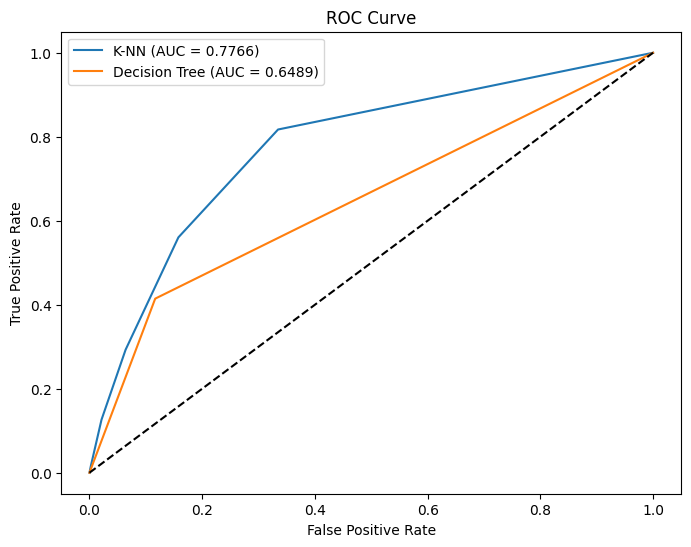

In [10]:
def evaluate_model(y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    return accuracy, precision, recall, f1, auc, fpr, tpr

# Evaluasi model K-NN
metrics_knn = evaluate_model(y_test, y_pred_knn, y_prob_knn)

# Evaluasi model Decision Tree
metrics_dt = evaluate_model(y_test, y_pred_dt, y_prob_dt)

# Tampilkan hasil evaluasi
print("Metrik Evaluasi untuk K-NN:")
print(f"Akurasi : {metrics_knn[0]:.4f}")
print(f"Presisi : {metrics_knn[1]:.4f}")
print(f"Recall  : {metrics_knn[2]:.4f}")
print(f"F1 Score: {metrics_knn[3]:.4f}")
print(f"AUC     : {metrics_knn[4]:.4f}\n")

print("Metrik Evaluasi untuk Decision Tree:")
print(f"Akurasi : {metrics_dt[0]:.4f}")
print(f"Presisi : {metrics_dt[1]:.4f}")
print(f"Recall  : {metrics_dt[2]:.4f}")
print(f"F1 Score: {metrics_dt[3]:.4f}")
print(f"AUC     : {metrics_dt[4]:.4f}")

# Plot ROC Curve untuk kedua model
plt.figure(figsize=(8,6))
plt.plot(metrics_knn[5], metrics_knn[6], label=f'K-NN (AUC = {metrics_knn[4]:.4f})')
plt.plot(metrics_dt[5], metrics_dt[6], label=f'Decision Tree (AUC = {metrics_dt[4]:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()